# Keras -- MLPs on MNIST

In [1]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist 
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from tensorflow.python.keras import Input, Model
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.python.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential 
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

## 1.Load data 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image.y{0,1,2.....9}
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2.simple Input output model with no hidden layer

### 2.1 intialize parametrs

In [11]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1] # 784

batch_size = 128 
nb_epoch = 20

### 2.2 intialize model

In [12]:
# start building a model
#input(728)-->outpu(10) as 10 classes are there

model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

### 2.3 Configure model and fit on train data

In [13]:
# Before training a model, you need to configure the learning process, which is done via the compile method
#fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, steps_per_epoch=500, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 1.2684 - accuracy: 0.6990 - val_loss: 0.7962 - val_accuracy: 0.8329
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.7006 - accuracy: 0.8413 - val_loss: 0.5967 - val_accuracy: 0.8615
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5761 - accuracy: 0.8595 - val_loss: 0.5176 - val_accuracy: 0.8760
Epoch 4/20
500/500 [==============================] - 1s 3ms/step - loss: 0.5165 - accuracy: 0.8697 - val_loss: 0.4731 - val_accuracy: 0.8829
Epoch 5/20
500/500 [==============================] - 1s 3ms/step - loss: 0.4803 - accuracy: 0.8763 - val_loss: 0.4443 - val_accuracy: 0.8878
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.8806 - val_loss: 0.4235 - val_accuracy: 0.8908
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4368 - accuracy: 0.8838 - val_loss: 0.4080 - val_accuracy: 0.8940
Epoch 

Test score: 0.3329598903656006
Test accuracy: 0.9081000089645386


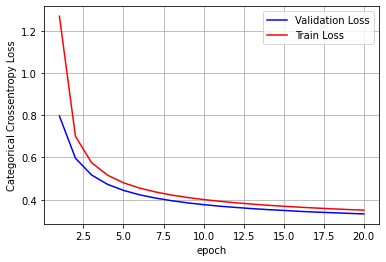

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Assignment start Below

# 1.Two hidden layer Architecture 

## 1.1 Two hidden layer with Relu + Adam

In [28]:
model1_relu = Sequential()
model1_relu.add(Dense(420, activation='relu', input_shape=(input_dim,)))
model1_relu.add(Dense(100, activation='relu'))
model1_relu.add(Dense(output_dim, activation='softmax'))
model1_relu.build()
model1_relu.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 420)               329700    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               42100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 372,810
Trainable params: 372,810
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.2457 - accuracy: 0.9300 - val_loss: 0.1191 - val_accuracy: 0.9641
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0928 - accuracy: 0.9722 - val_loss: 0.0884 - val_accuracy: 0.9710
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0800 - val_accuracy: 0.9756
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0705 - val_accuracy: 0.9802
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0730 - val_accuracy: 0.9793
Epoch 

Test score: 0.09534730017185211
Test accuracy: 0.9829000234603882


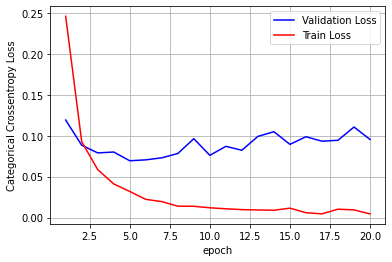

In [19]:
score = model1_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [21]:
for layers in model1_relu.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model1_relu.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name module_wrapper_7 ,input shape (None, 784) ,output shape (None, 420)
layer name module_wrapper_8 ,input shape (None, 420) ,output shape (None, 100)
layer name module_wrapper_9 ,input shape (None, 100) ,output shape (None, 10)
6
(784, 420)
(420,)
(420, 100)
(100,)
(100, 10)
(10,)


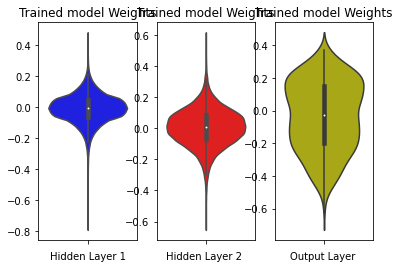

In [22]:
w_after = model1_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### batch normalization

In [27]:


model1_batch = Sequential()

model1_batch.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.069, stddev=0.039, seed=None)))
model1_batch.add(BatchNormalization())

model1_batch.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model1_batch.add(BatchNormalization())

model1_batch.add(Dense(output_dim, activation='softmax'))

model.build()
model1_batch.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 420)               329700    
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 420)               1680      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               42100     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 374,890
Trainable params: 373,850
Non-trainable params: 1,040
_________________________________________________________________


In [29]:
model1_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.3112 - accuracy: 0.9096 - val_loss: 0.1775 - val_accuracy: 0.9477
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1577 - accuracy: 0.9543 - val_loss: 0.1359 - val_accuracy: 0.9596
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1183 - accuracy: 0.9650 - val_loss: 0.1070 - val_accuracy: 0.9687
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0967 - accuracy: 0.9714 - val_loss: 0.1107 - val_accuracy: 0.9670
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0821 - accuracy: 0.9747 - val_loss: 0.0890 - val_accuracy: 0.9724
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0833 - val_accuracy: 0.9747

Test score: 0.08354396373033524
Test accuracy: 0.9790999889373779


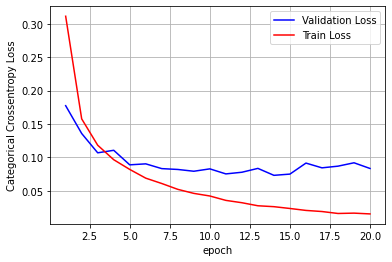

In [30]:
score = model1_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [31]:
for layers in model1_batch.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model1_batch.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense ,input shape (None, 784) ,output shape (None, 420)
layer name module_wrapper_10 ,input shape (None, 420) ,output shape (None, 420)
layer name dense_1 ,input shape (None, 420) ,output shape (None, 100)
layer name module_wrapper_11 ,input shape (None, 100) ,output shape (None, 100)
layer name dense_2 ,input shape (None, 100) ,output shape (None, 10)
14
(784, 420)
(420,)
(420,)
(420,)
(420,)
(420,)
(420, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 10)
(10,)


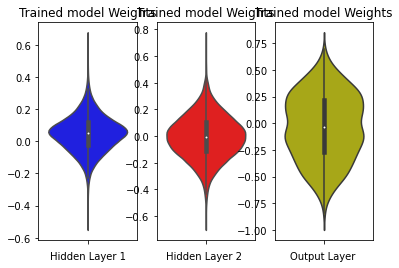

In [32]:
w_after = model1_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### dropout 

In [ ]:

# Using relu
#If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
#h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
#h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
#out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)

In [33]:
from tensorflow.keras.layers import Dropout

model1_drop = Sequential()

model1_drop.add(Dense(420, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.069, seed=None)))
model1_drop.add(BatchNormalization())
model1_drop.add(Dropout(0.5))

model1_drop.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model1_drop.add(BatchNormalization())
model1_drop.add(Dropout(0.5))

model1_drop.add(Dense(output_dim, activation='softmax'))


model1_drop.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 420)               329700    
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 420)               1680      
_________________________________________________________________
dropout (Dropout)            (None, 420)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               42100     
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [34]:
model1_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5487 - accuracy: 0.8320 - val_loss: 0.1711 - val_accuracy: 0.9469
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2547 - accuracy: 0.9239 - val_loss: 0.1253 - val_accuracy: 0.9602
Epoch 3/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1995 - accuracy: 0.9407 - val_loss: 0.1032 - val_accuracy: 0.9686
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1692 - accuracy: 0.9500 - val_loss: 0.0908 - val_accuracy: 0.9722
Epoch 5/20
469/469 [==============================] - 5s 12ms/step - loss: 0.1493 - accuracy: 0.9552 - val_loss: 0.0830 - val_accuracy: 0.9740
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1304 - accuracy: 0.9610 - val_loss: 0.0800 - val_accuracy: 0.9738
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1179 - accuracy: 0.9642 - val_loss: 0.0740 - val_accuracy: 0.9759

Test score: 0.06042179465293884
Test accuracy: 0.9818999767303467


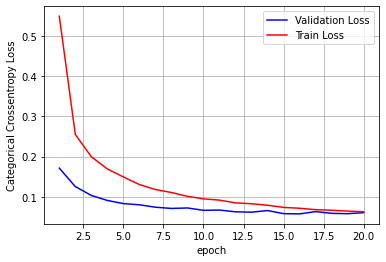

In [35]:
score = model1_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [36]:
for layers in model1_drop.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model1_drop.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_6 ,input shape (None, 784) ,output shape (None, 420)
layer name module_wrapper_12 ,input shape (None, 420) ,output shape (None, 420)
layer name dropout ,input shape (None, 420) ,output shape (None, 420)
layer name dense_7 ,input shape (None, 420) ,output shape (None, 100)
layer name module_wrapper_13 ,input shape (None, 100) ,output shape (None, 100)
layer name dropout_1 ,input shape (None, 100) ,output shape (None, 100)
layer name dense_8 ,input shape (None, 100) ,output shape (None, 10)
14
(784, 420)
(420,)
(420,)
(420,)
(420,)
(420,)
(420, 100)
(100,)
(100,)
(100,)
(100,)
(100,)
(100, 10)
(10,)


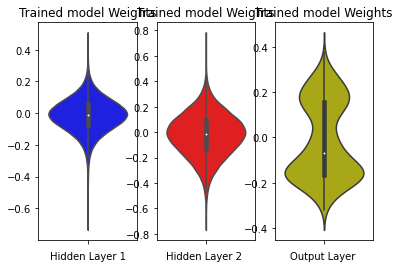

In [37]:
w_after = model1_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[12].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 2.Three hidden layer Architecture

## 2.1 Three hidden layer with Relu + Adam

In [38]:
batch_size = 150
nb_epoch = 30

In [39]:
model2_relu = Sequential()
model2_relu.add(Dense(520, activation='relu', input_shape=(input_dim,)))
model2_relu.add(Dense(320, activation='relu'))
model2_relu.add(Dense(120, activation='relu'))
model2_relu.add(Dense(output_dim, activation='softmax'))
model2_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 520)               408200    
_________________________________________________________________
dense_10 (Dense)             (None, 320)               166720    
_________________________________________________________________
dense_11 (Dense)             (None, 120)               38520     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1210      
Total params: 614,650
Trainable params: 614,650
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
400/400 [==============================] - 7s 16ms/step - loss: 0.2379 - accuracy: 0.9280 - val_loss: 0.1198 - val_accuracy: 0.9630
Epoch 2/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0861 - accuracy: 0.9727 - val_loss: 0.0812 - val_accuracy: 0.9731
Epoch 3/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0577 - accuracy: 0.9821 - val_loss: 0.0752 - val_accuracy: 0.9773
Epoch 4/30
400/400 [==============================] - 6s 16ms/step - loss: 0.0407 - accuracy: 0.9867 - val_loss: 0.0783 - val_accuracy: 0.9769
Epoch 5/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0691 - val_accuracy: 0.9797
Epoch 6/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0780 - val_accuracy: 0.9784
Epoch 7/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0629 - val_accuracy: 0.9817

Test score: 0.1049598753452301
Test accuracy: 0.9812999963760376


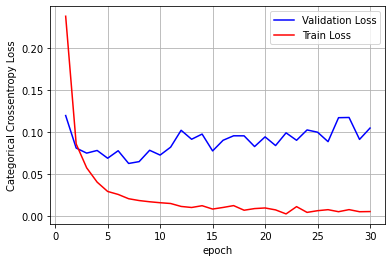

In [41]:
score = model2_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
for layers in model2_relu.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape,",bias shape",layers.bias.shape)
w_after = model2_relu.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_9 ,input shape (None, 784) ,output shape (None, 520) ,bias shape (520,)
layer name dense_10 ,input shape (None, 520) ,output shape (None, 320) ,bias shape (320,)
layer name dense_11 ,input shape (None, 320) ,output shape (None, 120) ,bias shape (120,)
layer name dense_12 ,input shape (None, 120) ,output shape (None, 10) ,bias shape (10,)
8
(784, 520)
(520,)
(520, 320)
(320,)
(320, 120)
(120,)
(120, 10)
(10,)


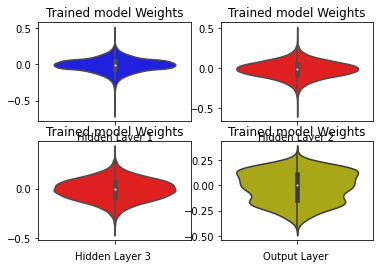

In [43]:
w_after = model2_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2.2 batch normalization

In [46]:


model2_batch = Sequential()

model2_batch.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model2_batch.add(BatchNormalization())

model2_batch.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model2_batch.add(BatchNormalization())

model2_batch.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model2_batch.add(BatchNormalization())

model2_batch.add(Dense(output_dim, activation='softmax'))


model2_batch.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               392500    
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 500)               2000      
_________________________________________________________________
dense_15 (Dense)             (None, 200)               100200    
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 200)               800       
_________________________________________________________________
dense_16 (Dense)             (None, 50)                10050     
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 50)                200       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [47]:
model2_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
400/400 [==============================] - 7s 16ms/step - loss: 0.2290 - accuracy: 0.9350 - val_loss: 0.1178 - val_accuracy: 0.9637
Epoch 2/30
400/400 [==============================] - 6s 16ms/step - loss: 0.0743 - accuracy: 0.9780 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 3/30
400/400 [==============================] - 6s 16ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0752 - val_accuracy: 0.9767
Epoch 4/30
400/400 [==============================] - 6s 16ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0854 - val_accuracy: 0.9740
Epoch 5/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0915 - val_accuracy: 0.9738
Epoch 6/30
400/400 [==============================] - 6s 16ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.0976 - val_accuracy: 0.9717
Epoch 7/30
400/400 [==============================] - 6s 15ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0760 - val_accuracy: 0.9771

Test score: 0.09398580342531204
Test accuracy: 0.980400025844574


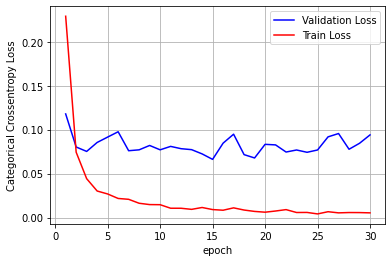

In [48]:
score = model2_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [50]:
for layers in model2_batch.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model2_batch.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_14 ,input shape (None, 784) ,output shape (None, 500)
layer name module_wrapper_14 ,input shape (None, 500) ,output shape (None, 500)
layer name dense_15 ,input shape (None, 500) ,output shape (None, 200)
layer name module_wrapper_15 ,input shape (None, 200) ,output shape (None, 200)
layer name dense_16 ,input shape (None, 200) ,output shape (None, 50)
layer name module_wrapper_16 ,input shape (None, 50) ,output shape (None, 50)
layer name dense_17 ,input shape (None, 50) ,output shape (None, 10)
20
(784, 500)
(500,)
(500,)
(500,)
(500,)
(500,)
(500, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


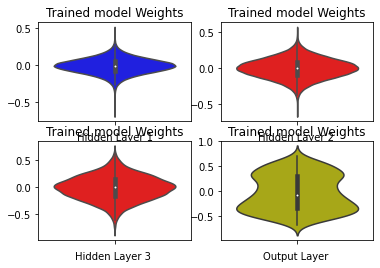

In [51]:
w_after = model2_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 2.3 dropout

In [52]:
from tensorflow.keras.layers import Dropout

model2_drop = Sequential()

model2_drop.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)))
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model2_drop.add(BatchNormalization())
model2_drop.add(Dropout(0.5))

model2_drop.add(Dense(output_dim, activation='softmax'))


model2_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 500)               2000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               100200    
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 200)               800       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)              

In [53]:
model2_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model2_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
400/400 [==============================] - 7s 16ms/step - loss: 0.8117 - accuracy: 0.7549 - val_loss: 0.2113 - val_accuracy: 0.9345
Epoch 2/30
400/400 [==============================] - 6s 15ms/step - loss: 0.3406 - accuracy: 0.9036 - val_loss: 0.1478 - val_accuracy: 0.9549
Epoch 3/30
400/400 [==============================] - 6s 15ms/step - loss: 0.2537 - accuracy: 0.9296 - val_loss: 0.1221 - val_accuracy: 0.9623
Epoch 4/30
400/400 [==============================] - 6s 15ms/step - loss: 0.2066 - accuracy: 0.9436 - val_loss: 0.1039 - val_accuracy: 0.9688
Epoch 5/30
400/400 [==============================] - 6s 15ms/step - loss: 0.1823 - accuracy: 0.9496 - val_loss: 0.0958 - val_accuracy: 0.9707
Epoch 6/30
400/400 [==============================] - 6s 15ms/step - loss: 0.1599 - accuracy: 0.9558 - val_loss: 0.0931 - val_accuracy: 0.9731
Epoch 7/30
400/400 [==============================] - 6s 15ms/step - loss: 0.1440 - accuracy: 0.9599 - val_loss: 0.0854 - val_accuracy: 0.9751

Test score: 0.06829633563756943
Test accuracy: 0.9822999835014343


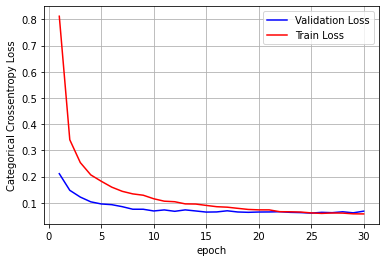

In [54]:
score = model2_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [56]:
for layers in model2_drop.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model2_drop.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_18 ,input shape (None, 784) ,output shape (None, 500)
layer name module_wrapper_17 ,input shape (None, 500) ,output shape (None, 500)
layer name dropout_2 ,input shape (None, 500) ,output shape (None, 500)
layer name dense_19 ,input shape (None, 500) ,output shape (None, 200)
layer name module_wrapper_18 ,input shape (None, 200) ,output shape (None, 200)
layer name dropout_3 ,input shape (None, 200) ,output shape (None, 200)
layer name dense_20 ,input shape (None, 200) ,output shape (None, 50)
layer name module_wrapper_19 ,input shape (None, 50) ,output shape (None, 50)
layer name dropout_4 ,input shape (None, 50) ,output shape (None, 50)
layer name dense_21 ,input shape (None, 50) ,output shape (None, 10)
20
(784, 500)
(500,)
(500,)
(500,)
(500,)
(500,)
(500, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 50)
(50,)
(50,)
(50,)
(50,)
(50,)
(50, 10)
(10,)


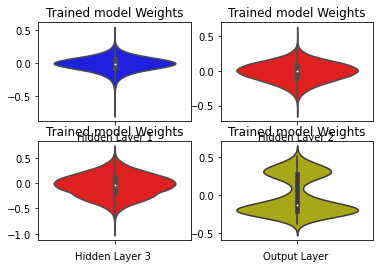

In [57]:
w_after =  model2_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
out_w = w_after[18].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(2, 2, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(2, 2, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(2, 2, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(2, 2, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 3.Five hidden layer Architecture

### 3.1 Five hidden layer with Relu + Adam

In [58]:
batch_size = 100
nb_epoch = 20

In [59]:
model3_relu = Sequential()
model3_relu.add(Dense(600, activation='relu', input_shape=(input_dim,)))
model3_relu.add(Dense(300, activation='relu'))
model3_relu.add(Dense(150, activation='relu'))
model3_relu.add(Dense(75, activation='relu'))
model3_relu.add(Dense(30, activation='relu'))
model3_relu.add(Dense(output_dim, activation='softmax'))
model3_relu.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_23 (Dense)             (None, 300)               180300    
_________________________________________________________________
dense_24 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_25 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_26 (Dense)             (None, 30)                2280      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                310       
Total params: 710,365
Trainable params: 710,365
Non-trainable params: 0
_______________________________________________

In [60]:
model3_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
600/600 [==============================] - 9s 14ms/step - loss: 0.2523 - accuracy: 0.9239 - val_loss: 0.1648 - val_accuracy: 0.9506
Epoch 2/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0906 - accuracy: 0.9718 - val_loss: 0.0835 - val_accuracy: 0.9744
Epoch 3/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.0714 - val_accuracy: 0.9774
Epoch 4/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0798 - val_accuracy: 0.9791
Epoch 6/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0766 - val_accuracy: 0.9798
Epoch 7/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0810 - val_accuracy: 0.9787

Test score: 0.09438823908567429
Test accuracy: 0.9843999743461609


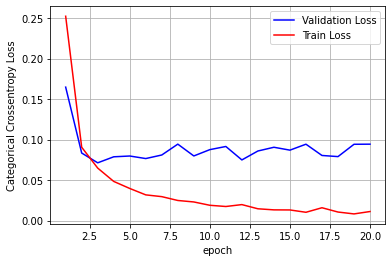

In [61]:
score = model3_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')


x = list(range(1,nb_epoch+1))



vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [62]:
for layers in model3_relu.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape,",bias shape",layers.bias.shape)
w_after = model3_relu.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_22 ,input shape (None, 784) ,output shape (None, 600) ,bias shape (600,)
layer name dense_23 ,input shape (None, 600) ,output shape (None, 300) ,bias shape (300,)
layer name dense_24 ,input shape (None, 300) ,output shape (None, 150) ,bias shape (150,)
layer name dense_25 ,input shape (None, 150) ,output shape (None, 75) ,bias shape (75,)
layer name dense_26 ,input shape (None, 75) ,output shape (None, 30) ,bias shape (30,)
layer name dense_27 ,input shape (None, 30) ,output shape (None, 10) ,bias shape (10,)
12
(784, 600)
(600,)
(600, 300)
(300,)
(300, 150)
(150,)
(150, 75)
(75,)
(75, 30)
(30,)
(30, 10)
(10,)


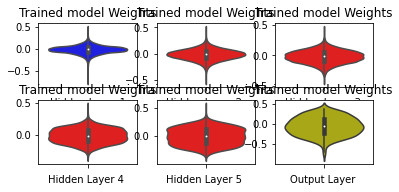

In [63]:
w_after = model3_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(3, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(3, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(3, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(3, 3, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(3, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(3, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3.2 batch Normalization

In [66]:


model3_batch = Sequential()

model3_batch.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model3_batch.add(BatchNormalization())

model3_batch.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model3_batch.add(BatchNormalization())

model3_batch.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model3_batch.add(BatchNormalization())

model3_batch.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.163, seed=None)) )
model3_batch.add(BatchNormalization())

model3_batch.add(Dense(30, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.258, seed=None)) )
model3_batch.add(BatchNormalization())

model3_batch.add(Dense(output_dim, activation='softmax'))


model3_batch.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 600)               471000    
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, 600)               2400      
_________________________________________________________________
dense_30 (Dense)             (None, 300)               180300    
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 300)               1200      
_________________________________________________________________
dense_31 (Dense)             (None, 150)               45150     
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 150)               600       
_________________________________________________________________
dense_32 (Dense)             (None, 75)              

In [67]:
model3_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
600/600 [==============================] - 10s 15ms/step - loss: 0.2466 - accuracy: 0.9336 - val_loss: 0.1189 - val_accuracy: 0.9641
Epoch 2/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0928 - accuracy: 0.9719 - val_loss: 0.0979 - val_accuracy: 0.9704
Epoch 3/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 4/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0506 - accuracy: 0.9832 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 5/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 6/20
600/600 [==============================] - 9s 16ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0871 - val_accuracy: 0.9751
Epoch 7/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0739 - val_accuracy: 0.978

Test score: 0.07062286138534546
Test accuracy: 0.9829999804496765


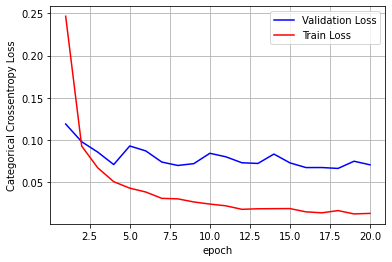

In [68]:
score = model3_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [70]:
for layers in model3_batch.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model3_batch.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_29 ,input shape (None, 784) ,output shape (None, 600)
layer name module_wrapper_20 ,input shape (None, 600) ,output shape (None, 600)
layer name dense_30 ,input shape (None, 600) ,output shape (None, 300)
layer name module_wrapper_21 ,input shape (None, 300) ,output shape (None, 300)
layer name dense_31 ,input shape (None, 300) ,output shape (None, 150)
layer name module_wrapper_22 ,input shape (None, 150) ,output shape (None, 150)
layer name dense_32 ,input shape (None, 150) ,output shape (None, 75)
layer name module_wrapper_23 ,input shape (None, 75) ,output shape (None, 75)
layer name dense_33 ,input shape (None, 75) ,output shape (None, 30)
layer name module_wrapper_24 ,input shape (None, 30) ,output shape (None, 30)
layer name dense_34 ,input shape (None, 30) ,output shape (None, 10)
32
(784, 600)
(600,)
(600,)
(600,)
(600,)
(600,)
(600, 300)
(300,)
(300,)
(300,)
(300,)
(300,)
(300, 150)
(150,)
(150,)
(150,)
(150,)
(150,)
(150, 75)
(75,)
(75,)
(75,)
(75,)
(75,)
(7

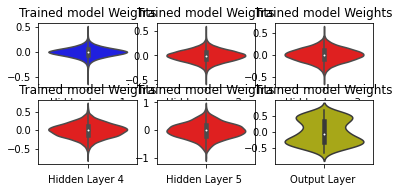

In [72]:
w_after = model3_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
h4_w = w_after[18].flatten().reshape(-1,1)
h5_w = w_after[24].flatten().reshape(-1,1)
out_w = w_after[30].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(3, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(3, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(3, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(3, 3,4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(3, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(3, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### 3.3 drop out

In [73]:
from tensorflow.keras.layers import Dropout

model3_drop = Sequential()

model3_drop.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None)))
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(75, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.163, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(30, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.258, seed=None)) )
model3_drop.add(BatchNormalization())
model3_drop.add(Dropout(0.5))

model3_drop.add(Dense(output_dim, activation='softmax'))


model3_drop.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 600)               471000    
_________________________________________________________________
module_wrapper_25 (ModuleWra (None, 600)               2400      
_________________________________________________________________
dropout_5 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 300)               180300    
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 300)               1200      
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 150)             

In [74]:
model3_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
600/600 [==============================] - 12s 17ms/step - loss: 1.4529 - accuracy: 0.5181 - val_loss: 0.3517 - val_accuracy: 0.9005
Epoch 2/20
600/600 [==============================] - 10s 17ms/step - loss: 0.5887 - accuracy: 0.8265 - val_loss: 0.1942 - val_accuracy: 0.9475
Epoch 3/20
600/600 [==============================] - 10s 17ms/step - loss: 0.4119 - accuracy: 0.8928 - val_loss: 0.1587 - val_accuracy: 0.9571
Epoch 4/20
600/600 [==============================] - 10s 17ms/step - loss: 0.3392 - accuracy: 0.9167 - val_loss: 0.1446 - val_accuracy: 0.9627
Epoch 5/20
600/600 [==============================] - 10s 17ms/step - loss: 0.2871 - accuracy: 0.9305 - val_loss: 0.1158 - val_accuracy: 0.9700
Epoch 6/20
600/600 [==============================] - 10s 17ms/step - loss: 0.2568 - accuracy: 0.9398 - val_loss: 0.1238 - val_accuracy: 0.9696
Epoch 7/20
600/600 [==============================] - 10s 17ms/step - loss: 0.2320 - accuracy: 0.9455 - val_loss: 0.1117 - val_accuracy:

Test score: 0.07375040650367737
Test accuracy: 0.9836999773979187


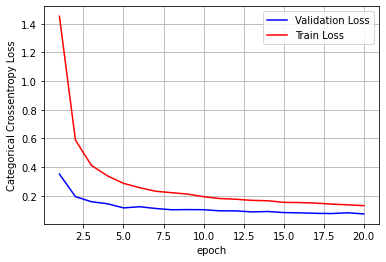

In [75]:
score = model3_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [77]:
for layers in model3_drop.layers:
    print("layer name",layers.name,",input shape",layers.input_shape,",output shape",layers.output_shape)
w_after = model3_drop.get_weights()
print(len(w_after))
    
for i in range(len(w_after)):
    print(w_after[i].shape)

layer name dense_35 ,input shape (None, 784) ,output shape (None, 600)
layer name module_wrapper_25 ,input shape (None, 600) ,output shape (None, 600)
layer name dropout_5 ,input shape (None, 600) ,output shape (None, 600)
layer name dense_36 ,input shape (None, 600) ,output shape (None, 300)
layer name module_wrapper_26 ,input shape (None, 300) ,output shape (None, 300)
layer name dropout_6 ,input shape (None, 300) ,output shape (None, 300)
layer name dense_37 ,input shape (None, 300) ,output shape (None, 150)
layer name module_wrapper_27 ,input shape (None, 150) ,output shape (None, 150)
layer name dropout_7 ,input shape (None, 150) ,output shape (None, 150)
layer name dense_38 ,input shape (None, 150) ,output shape (None, 75)
layer name module_wrapper_28 ,input shape (None, 75) ,output shape (None, 75)
layer name dropout_8 ,input shape (None, 75) ,output shape (None, 75)
layer name dense_39 ,input shape (None, 75) ,output shape (None, 30)
layer name module_wrapper_29 ,input shape (N

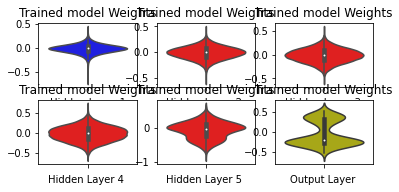

In [78]:
w_after = model3_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[6].flatten().reshape(-1,1)
h3_w = w_after[12].flatten().reshape(-1,1)
h4_w = w_after[18].flatten().reshape(-1,1)
h5_w = w_after[24].flatten().reshape(-1,1)
out_w = w_after[30].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(3, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(3, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(3, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(3, 3,4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(3, 3, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(3, 3, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>4.observation table</h2>


In [81]:
from prettytable import PrettyTable
x = PrettyTable()

x = PrettyTable()
x.field_names = ["layers", "Model", "epoch", "batch size","test score","accuracy"]
x.add_row(["two layers", "Relu+adam optimizer", "20" ,"128","0.09","98"])
x.add_row(["two layers", "Relu+Batch Nor.+adam optimizer", "20" ,"128","0.08","97"])
x.add_row(["two layers", "Relu+Batch Nor+dropout+adam optimizer", "20" ,"128","0.06","98"])

x.add_row(["three layers", "Relu+adam optimizer", "30" ,"150","0.10","98"])
x.add_row(["three layers", "Relu+Batch Nor.+adam optimizer", "30" ,"150","0.09","98"])
x.add_row(["three layers", "Relu+Batch Nor+dropout+adam optimizer", "30" ,"150","0.06","98"])

x.add_row(["five layers", "Relu+adam optimizer", "20" ,"100","0.09","98"])
x.add_row(["five layers", "Relu+Batch Nor.+adam optimizer", "20" ,"100","0.07","98"])
x.add_row(["five layers", "Relu+Batch Nor+dropout+adam optimizer", "20" ,"100","0.07","98"])


print(x)

+--------------+---------------------------------------+-------+------------+------------+----------+
|    layers    |                 Model                 | epoch | batch size | test score | accuracy |
+--------------+---------------------------------------+-------+------------+------------+----------+
|  two layers  |          Relu+adam optimizer          |   20  |    128     |    0.09    |    98    |
|  two layers  |     Relu+Batch Nor.+adam optimizer    |   20  |    128     |    0.08    |    97    |
|  two layers  | Relu+Batch Nor+dropout+adam optimizer |   20  |    128     |    0.06    |    98    |
| three layers |          Relu+adam optimizer          |   30  |    150     |    0.10    |    98    |
| three layers |     Relu+Batch Nor.+adam optimizer    |   30  |    150     |    0.09    |    98    |
| three layers | Relu+Batch Nor+dropout+adam optimizer |   30  |    150     |    0.06    |    98    |
| five layers  |          Relu+adam optimizer          |   20  |    100     |    0

## 5.Conclusion


1.As the number of layers increse We face overfit proble

2.Model give better performance for batch narmalization and drop out